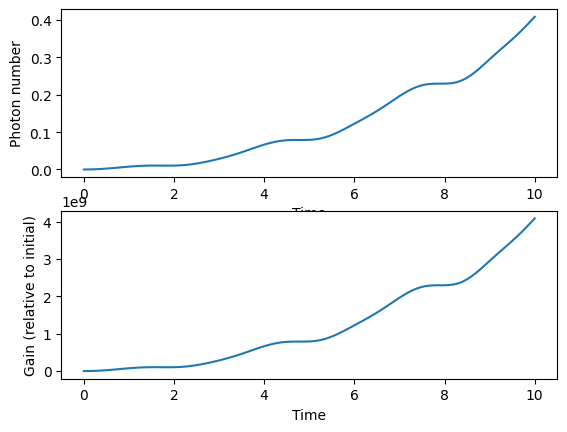

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define parameters
N = 10  # Dimension of Hilbert space
C = 1.0  # Capacitance
L0 = 1.0  # Constant inductance
Lp = 0.1  # Pumping amplitude
omega = 1.0  # Pumping frequency
epsilon = 0.1  # Drive strength

# Define operators
a = destroy(N)  # Annihilation operator
Q = (1j / np.sqrt(2)) * (a - a.dag())  # Charge operator
Phi = (1 / np.sqrt(2)) * (a + a.dag())  # Flux operator

# Time-dependent inductance function
def L_t(t, args):
    L0 = args['L0']
    Lp = args['Lp']
    omega = args['omega']
    return L0 + Lp * np.sin(2 * omega * t)

# Define the Hamiltonian components
H_cap = Q**2 / (2 * C)  # Capacitor term (static)
H_inductor = Phi**2 / 2  # Inductor term without L(t)

# Define the time-dependent Hamiltonian for the inductor
H = [H_cap, [H_inductor, lambda t, args: 1 / L_t(t, args)]]

# Add the driving term to the Hamiltonian
H_drive = [a + a.dag(), lambda t, args: epsilon * np.cos(omega * t)]

# Complete Hamiltonian including the drive
H.append(H_drive)

# Define the initial state
psi0 = basis(N, 0)  # Vacuum state

# Time evolution
tlist = np.linspace(0, 10, 100)

# Solve the system
args = {'L0': L0, 'Lp': Lp, 'omega': omega}
result = mesolve(H, psi0, tlist, [], [a.dag() * a], args=args)

# Photon number at time t and initial time (vacuum)
n_t = result.expect[0]  # Photon number over time
n_0 = n_t[0]  # Photon number at t=0 (should be 0 for vacuum)

# Avoid division by zero if n_0 is 0 (initial vacuum state)
n_0 = n_0 if n_0 != 0 else 1e-10  # Small value to prevent division by zero

# Calculate gain over time
gain = n_t / n_0

# Plot the photon number and gain
plt.figure()
plt.subplot(211)
plt.plot(tlist, n_t)
plt.xlabel('Time')
plt.ylabel('Photon number')

plt.subplot(212)
plt.plot(tlist, gain)
plt.xlabel('Time')
plt.ylabel('Gain (relative to initial)')
plt.show()
